In [155]:
import numpy as np
import scipy.sparse

In [156]:
# add root folder to path
import sys
sys.path.append('../')

from utility import plots
plots.set_style()

# Simulating Quantum Systems Using A Discrete Hamiltonian
Assume $\hbar = 1$, $m = 1$ \
Via the time evolution operator $\hat{U}(t, 0) = e^{-i\hat{H}t}$

$$ \Psi(x, t) = e^{-i\hat{H}t} \Psi(x, 0) $$

and the Hamiltonian is given by

$$ \hat{H} = -\frac{1}{2} \nabla^2 + V(x)$$

In [157]:
# discretization of the domain
N = 100 # number of points
dx = 0.1 # spatial step

# discretization of the hamiltonian
# specify the potential as an array of size N

def hamiltonian(N, dx, V = None):
    """Construct the laplacian matrix for the 1D laplacian operator"""
    
    laplacian = scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N))
    H = -laplacian / (2*dx**2)
    if V is not None:
        H = H + scipy.sparse.diags(V) # converts the N array into a sparse diagonal matrix
    return H.tocsc() # convert to compressed sparse row format for efficiency
    

In [158]:
# define the time evolution operator
import scipy.linalg

def time_evolution_operator(H, dt):
    U = scipy.linalg.expm(-1j * H * dt).toarray() # expm is the matrix exponential
    # U is a unitary matrix so norm must be conserved
    U[(U * np.conj(U)) < 1e-10] = 0
    return scipy.sparse.csr_matrix(U) # convert back to sparse format

In [159]:
def simulate(psi, H, dt, t):
    # uses the time evolution operator to evolve the wavefunction a single timestep
    U = time_evolution_operator(H, dt)
    psi_arr = np.zeros((len(t), len(psi)), dtype=complex)
    psi_arr[0] = psi
    for i in range(1, len(t)):
        psi_arr[i] = U.dot(psi_arr[i-1])
    
    return psi_arr    

In [160]:
# need to calc probability density

def probability_density(psi):
    return psi * np.conj(psi)

# Gaussian Wave Packet, V=0

In [161]:
def gaussian_wavepacket(x, x0, sigma0, p0):
    """Gaussian wavepacket at x0 +/- sigma0, with average momentum, p0."""
    A = (2 * np.pi * sigma0**2)**(-0.25)
    return A * np.exp(1j*p0*x - ((x - x0)/(2 * sigma0))**2)

In [162]:
N = 1800
x, dx = np.linspace(-25, 155, N, endpoint=False, retstep=True)
t, dt = np.linspace(0, 100, 100, endpoint=False, retstep=True)
psi0 = gaussian_wavepacket(x, x0=0.0, sigma0=5.0, p0=1.0)
H = hamiltonian(N, dx)

psi_t = simulate(psi0, H, dt, t)

In [163]:
1/dt

1.0

Text(0.5, 1.0, 't = 0')

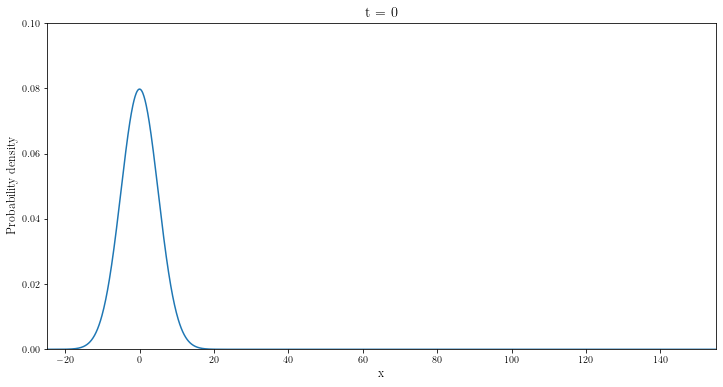

In [164]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# plot single frame
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, probability_density(psi_t[0]))
ax.set_xlim(-25, 155)
ax.set_ylim(0, 0.1)
ax.set_xlabel("x")
ax.set_ylabel("Probability density")
ax.set_title("t = 0")

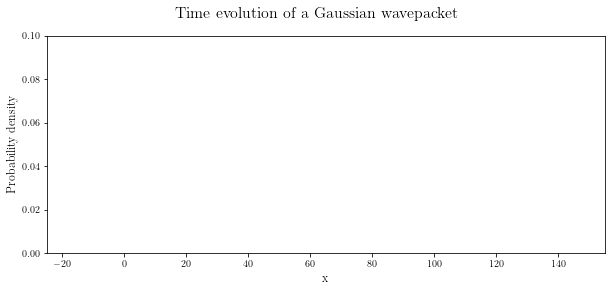

In [165]:
fig, ax = plt.subplots(figsize=(10, 4))

xdata, ydata = [], []
line, = ax.plot([], [], lw=2)
fig.suptitle("Time evolution of a Gaussian wavepacket", fontsize=16)
ax.set_xlabel("x")
ax.set_ylabel("Probability density")

def init():
    ax.set_xlim(-25, 155)
    ax.set_ylim(0, 0.1)
    return line,

def update(frame):
    xdata = x
    ydata = probability_density(psi_t[frame])
    line.set_data(xdata, ydata)
    ax.set_title("t = {:.2f}".format(frame * dt))
    return line,

fps = 60

ani = FuncAnimation(fig, update, frames=range(len(t)), init_func=init, blit=True, interval=fps)

In [166]:
HTML(ani.to_html5_video())

/home/john/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [167]:
from matplotlib import animation

mywriter = animation.FFMpegWriter(fps=fps)
ani.save('wavepacket.mp4', writer=mywriter, dpi=200)

/home/john/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


# QHO

In [174]:
N = 1024
x, dx = np.linspace(-64, 64, N, endpoint=False, retstep=True)
t, dt = np.linspace(0, 500, 100, endpoint=False, retstep=True)

psi0 = gaussian_wavepacket(x, x0=0, sigma0=3.0, p0=1.0)

V = (x / 32.0)**2 / 2
H = hamiltonian(N, dx, V=V)
psi_t = simulate(psi0, H, dt, t)

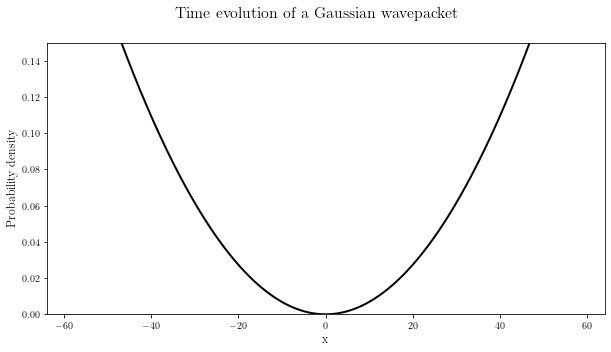

In [176]:
fig, ax = plt.subplots(figsize=(10, 5))

xdata, ydata = [], []
line, = ax.plot([], [], lw=2)
fig.suptitle("Time evolution of a Gaussian wavepacket", fontsize=16)
ax.set_xlabel("x")
ax.set_ylabel("Probability density")

def init():
    ax.set_xlim(-64, 64)
    ax.set_ylim(0, 0.15)
    ax.plot(x, V*0.14, color='black', lw=2)
    return line,

def update(frame):
    xdata = x
    ydata = probability_density(psi_t[frame])
    line.set_data(xdata, ydata)
    ax.set_title("t = {:.2f}".format(frame * dt))
    return line,

fps = 60

ani = FuncAnimation(fig, update, frames=range(len(t)), init_func=init, blit=True, interval=fps)

In [177]:
HTML(ani.to_html5_video())

/home/john/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
